In [8]:
import matplotlib.pyplot as plt
import torch
from dataset import get_datasets
from models import Autoencoder, VariationalAutoencoder, LitAutoencoder, LitVariationalAutoencoder

In [9]:
_, _, data = get_datasets(1, root='../data', download=True)

# Load models

In [10]:
# ae = LitAutoencoder.load_from_checkpoint(
#     r'../lightning_logs/version_5/checkpoints/epoch=33-step=163199.ckpt',
#     autoencoder=Autoencoder(100)
# ).autoencoder

vae = LitVariationalAutoencoder.load_from_checkpoint(
    r'../lightning_logs/version_1/checkpoints/epoch=18-step=91199.ckpt',
    autoencoder=VariationalAutoencoder(z_size=10)
).autoencoder

# Compare reconstruction

In [11]:
def sample_reconstruction(ae, vae, iterator, samples=3, **kwargs):
    fig, ax = plt.subplots(3, samples, **kwargs)
    ae.cuda().eval()
    vae.cuda().eval()
    for i in range(samples):
        with torch.no_grad():
            x, y = next(iterator)
            rec_ae = ae(x.cuda())[0].cpu()
            rec_vae = vae(x.cuda())[0].cpu()
        ax_original, ax_ae, ax_vae = ax[0, i], ax[1, i], ax[2, i]
        # print original image
        ax_original.set_title(f'Label: {y} original')
        ax_original.imshow(x.reshape(28, 28), cmap='gray')
        ax_original.set_xticks([]), ax_original.set_yticks([])

        # print ae reconstruction
        ax_ae.set_title(f'Label: {y} AE')
        ax_ae.imshow(rec_ae.reshape(28, 28), cmap='gray')
        ax_ae.set_xticks([]), ax_ae.set_yticks([])

        # print vae reconstruction
        ax_vae.set_title(f'Label: {y} VAE')
        ax_vae.imshow(rec_vae.reshape(28, 28), cmap='gray')
        ax_vae.set_xticks([]), ax_vae.set_yticks([])
    fig.tight_layout()
    plt.show()

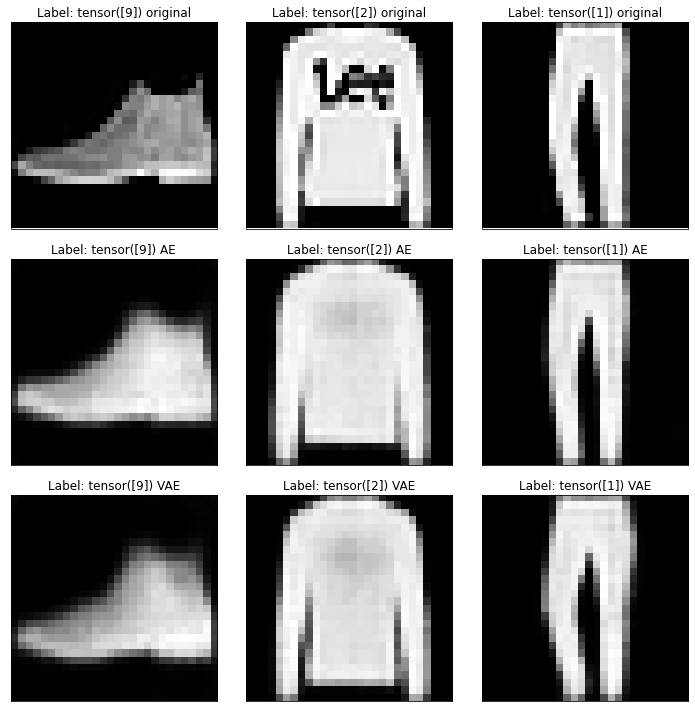

In [12]:
iterator = iter(data)
sample_reconstruction(vae, vae, iterator, figsize=(10, 10))

# Test generation

In [13]:
def generate_sample(ae, vae, z_size=100, samples=3, **kwargs):
    fig, ax = plt.subplots(2, samples, **kwargs)
    ae.cuda().eval()
    vae.cuda().eval()
    for i in range(samples):
        with torch.no_grad():
            noise = torch.randn(z_size).cuda()
            img_ae = ae.decoder(noise).cpu()
            img_vae = vae.decoder(noise)[0].cpu()
        ax_ae, ax_vae = ax[0, i], ax[1, i]

        ax_ae.set_title('AE')
        ax_ae.imshow(img_ae.reshape(28, 28), cmap='gray')
        ax_ae.set_xticks([]), ax_ae.set_yticks([])

        ax_vae.set_title('VAE')
        ax_vae.imshow(img_vae.reshape(28, 28), cmap='gray')
        ax_vae.set_xticks([]), ax_vae.set_yticks([])
    fig.tight_layout()
    plt.show()

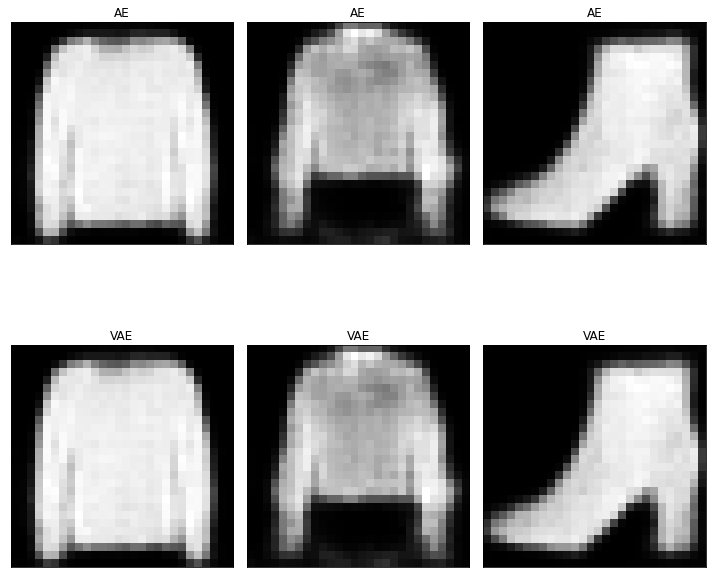

In [14]:
generate_sample(vae, vae, z_size=10, samples=3, figsize=(10, 10))